# Import functions for all processing
Put this notebook inside passive_interval_oddball_202412 project folder. The fllowing is the same as main.py at the beginning.

In [1]:
import sys
import warnings
warnings.filterwarnings('ignore')

import gc
import os
import argparse
from datetime import datetime

from modules import Trialization
from modules.ReadResults import read_ops

def combine_session_config_list(session_config_list):
    list_session_data_path = []
    for sc in session_config_list['list_config']:
        list_session_data_path += [
            os.path.join('results', sc['session_folder'], n)
            for n in sc['list_session_name'].keys()]
    list_session_name = [sc['list_session_name'] for sc in session_config_list['list_config']]
    list_session_name = {k: v for d in list_session_name for k, v in d.items()}
    session_config_list['list_session_name'] = list_session_name
    session_config_list['list_session_data_path'] = list_session_data_path
    return session_config_list

# Define the folder name to the sessions you want to process

## Folder structure

This notebook should be SomeWhere/passive_interval_oddball_202412/quick_start.ipynb.

The data should be SomeWhere/passive_interval_oddball_202412/SubjectName/SessionName.

In this example, we use 1 session from the random paradigm, and the session data is SomeWhere/passive_interval_oddball_202412/test/VTYH02_PPC_20250109_3331Random.

## How to set the sessions going into the analysis

Change list_session_name elements in session_config_test to add or exclude sessions. No need to change anything else at this time.

## It works for both single and cross subject analysis

Here, session_config_test is for cross subject analysis, while session_config_list_test specify the info for one subject. If you are running single subject analysis, list_config in session_config_list_test should have only 1 element for that subject.

## Using short long session as example below

In [2]:
session_config_test = {
        'list_session_name' : {
            #'VTYH02_PPC_20250109_3331Random' : 'random',
            'VTYH02_PPC_20250218_1451ShortLong' : 'short_long',
            'VTYH02_PPC_20250213_1451ShortLong' : 'short_long',
            #'VTYH02_PPC_20250122_4131FixJitterOdd' : 'fix_jitter_odd',
            },
        'session_folder' : 'YH02VT',
        'sig_tag' : 'all',
        'force_label' : None,
        }
session_config_list_test = {
    'list_config': [
        session_config_test,
        ],
    'label_names' : {
        '-1':'Exc',
        '1':'Inh_VIP',
        '2':'Inh_SST',
        },
    'subject_name' : 'YH02VT',
    'output_filename' : 'YH02VT_PPC_passive.html'
    }

Read all saved processsed results.

In [3]:
session_config_list = combine_session_config_list(session_config_list_test)
list_ops = read_ops(session_config_list['list_session_data_path'])
ops = list_ops[0]

from modules.ReadResults import read_all
[list_labels, list_masks,
 list_neural_trials, list_move_offset
 ] = read_all(session_config_list, smooth=False)

Reading subject 1/1


100%|████████████████████████████████████████████| 2/2 [00:00<00:00,  5.01it/s]


Set other useful variables.

In [4]:
cate_list = [[-1,1,2]]

import matplotlib.pyplot as plt

label_names = {'-1':'Exc', '1':'Inh_VIP', '2':'Inh_SST'}
cate = [-1,1,2]
roi_id = None
norm_mode='none'
cluster_cmap = plt.cm.hsv
standard = 1
oddball = 1
block = 0
mode = 'post'
temp_folder = 'temp_'+session_config_list['subject_name']
if not os.path.exists(os.path.join('results', 'temp_'+session_config_list['subject_name'])):
    os.makedirs(os.path.join('results', 'temp_'+session_config_list['subject_name']))

Run this to get session configurations. There is only 1 session so the list will have only 1 element. The list structure is using for cross session or cross subject settings.

In [5]:
session_config_list = combine_session_config_list(session_config_list_test)
list_ops = read_ops(session_config_list['list_session_data_path'])
print(session_config_list)
print(f'number of sessions: {len(list_ops)}')

{'list_config': [{'list_session_name': {'VTYH02_PPC_20250218_1451ShortLong': 'short_long', 'VTYH02_PPC_20250213_1451ShortLong': 'short_long'}, 'session_folder': 'YH02VT', 'sig_tag': 'all', 'force_label': None}], 'label_names': {'-1': 'Exc', '1': 'Inh_VIP', '2': 'Inh_SST'}, 'subject_name': 'YH02VT', 'output_filename': 'YH02VT_PPC_passive.html', 'list_session_name': {'VTYH02_PPC_20250218_1451ShortLong': 'short_long', 'VTYH02_PPC_20250213_1451ShortLong': 'short_long'}, 'list_session_data_path': ['results\\YH02VT\\VTYH02_PPC_20250218_1451ShortLong', 'results\\YH02VT\\VTYH02_PPC_20250213_1451ShortLong']}
number of sessions: 2


# Reading data results

Run the following to do trialization if it is not done yet. Otherwise, you can skip this.

Ignore the statistical test results for now.

In [6]:
#for i in range(len(list_ops)):
#    Trialization.run(list_ops[i])

Now you can read all results for analysis as follows. If you want to smooth the trace, set smooth=True instead.

In [7]:
[list_labels, list_masks,list_neural_trials, list_move_offset] = read_all(session_config_list, smooth=False)

Reading subject 1/1


100%|████████████████████████████████████████████| 2/2 [00:00<00:00,  5.36it/s]


list_neural_trials has the main neural data recordings and voltage recordings for further processing. Now show their shapes.

In [18]:
for k,v in list_neural_trials[0].items():
    print(f'shape of {k}: {v.shape}')

shape of dff: (93, 107135)
shape of time: (107135,)
shape of stim_labels: (2000, 8)
shape of vol_time: (36000001,)
shape of vol_stim_vis: (36000001,)
shape of vol_stim_aud: (36000001,)
shape of vol_flir: (36000001,)
shape of vol_pmt: (36000001,)
shape of vol_led: (36000001,)
shape of camera_time: (1,)
shape of camera_pupil: (107135,)


# Define utility functions

All the following codes are drawed from utils.py. No need to go through the details. Same as those in utils.py



In [19]:
# compute mean and sem for 3d array data.
def get_mean_sem(data, win_baseline=None):
    # compute mean.
    m = np.nanmean(data.reshape(-1, data.shape[-1]), axis=0)
    # compute sem.
    std = np.nanstd(data.reshape(-1, data.shape[-1]), axis=0)
    count = np.nansum(~np.isnan(data.reshape(-1, data.shape[-1])), axis=0)
    s = std / np.sqrt(count)
    return m, s

# compute indice with givn time window for dF/F.
def get_frame_idx_from_time(timestamps, c_time, l_time, r_time):
    l_idx = np.searchsorted(timestamps, c_time+l_time)
    r_idx = np.searchsorted(timestamps, c_time+r_time)
    return l_idx, r_idx

# Visualizing raw traces

Now show a segmentation of some important voltage recordings and dff data.

First, take a segmentation of the long data

In [34]:
import numpy as np
si = 0

# define time duration.
max_ms = 150000
start_time = 52000

# get segmentation for neural data.
l_idx, r_idx = get_frame_idx_from_time(list_neural_trials[si]['time'], 0, start_time, start_time+max_ms)
dff = list_neural_trials[si]['dff'][:,l_idx:r_idx]
time = list_neural_trials[si]['time'][l_idx:r_idx]

# get segmentation for external voltage recording.
l_idx, r_idx = get_frame_idx_from_time(list_neural_trials[si]['vol_time'], 0, start_time, start_time+max_ms)
vol_time = list_neural_trials[si]['vol_time'][l_idx:r_idx]
vol_stim_vis = list_neural_trials[si]['vol_stim_vis'][l_idx:r_idx]

print(f'shape of dff: {dff.shape}')
print(f'shape of time: {time.shape}')
print(f'shape of vol_time: {vol_time.shape}')
print(f'shape of vol_stim_vis: {vol_stim_vis.shape}')

shape of dff: (93, 4464)
shape of time: (4464,)
shape of vol_time: (1500000,)
shape of vol_stim_vis: (1500000,)


Now plot the results for example neurons.

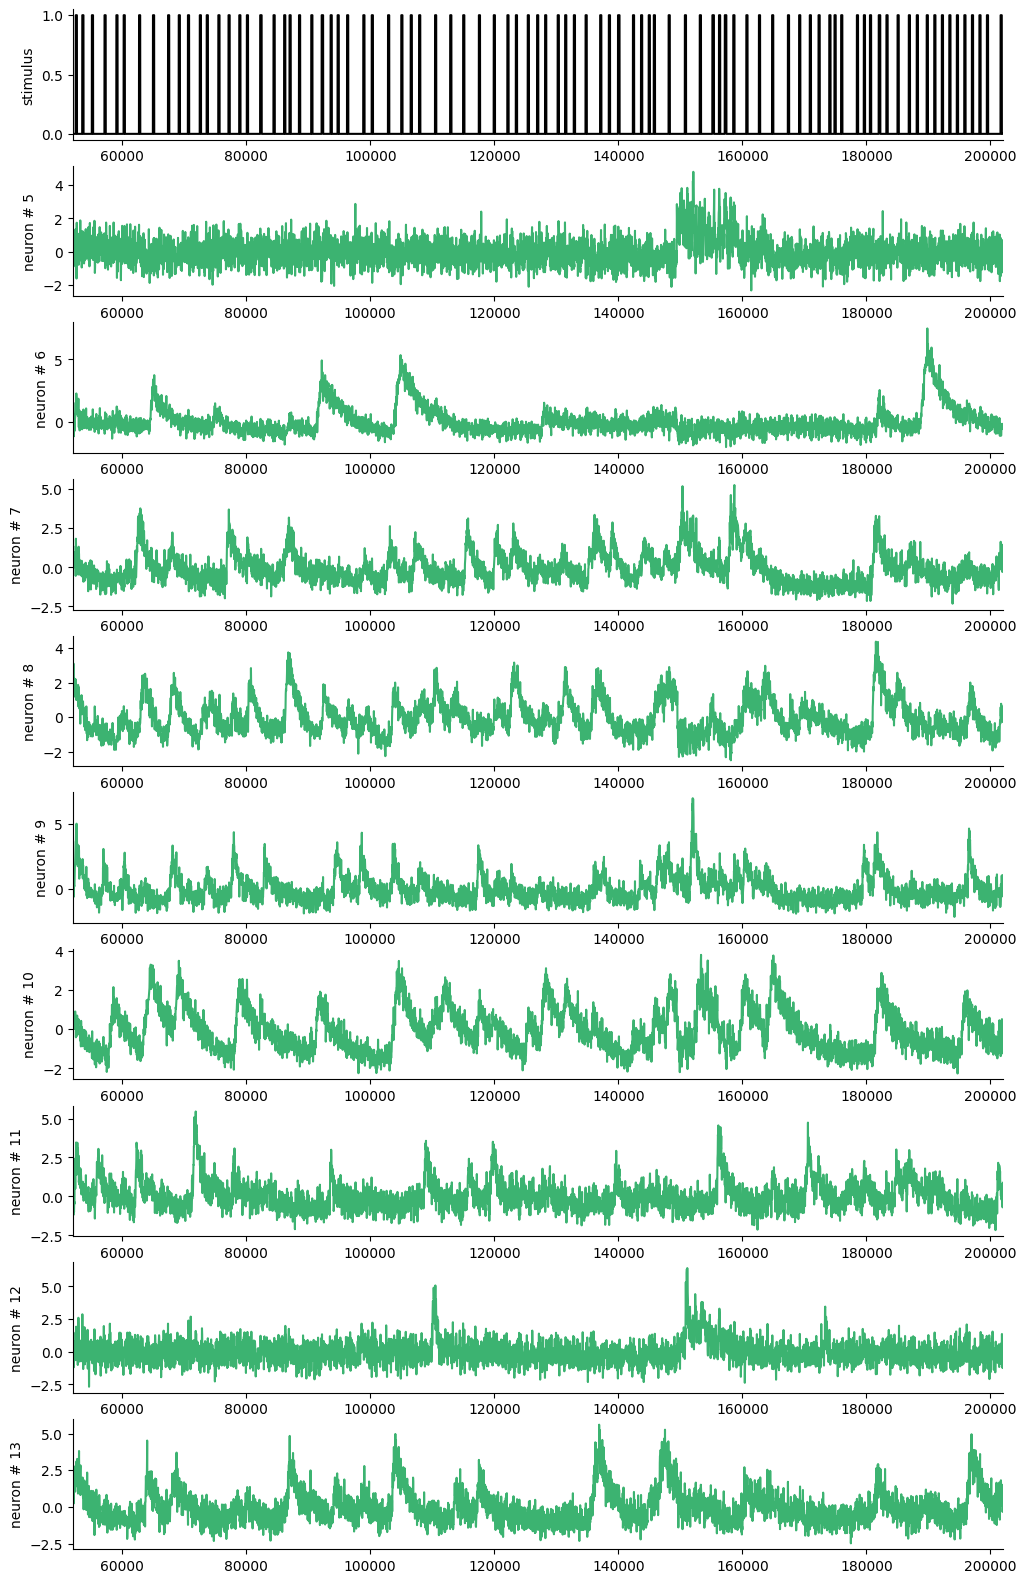

In [42]:
fig, axs = plt.subplots(10, 1, figsize=(12, 20))

axs[0].plot(vol_time, vol_stim_vis, color='black')
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].set_ylabel('stimulus')
axs[0].set_xlim([vol_time[0], vol_time[-1]])

example_neurons = np.arange(9)+5
for ai in range(9):
    axs[ai+1].plot(time, dff[example_neurons[ai], :], color='mediumseagreen')
    axs[ai+1].spines['right'].set_visible(False)
    axs[ai+1].spines['top'].set_visible(False)
    axs[ai+1].set_ylabel(f'neuron # {example_neurons[ai]}')
    axs[ai+1].set_xlim([time[0], time[-1]])
axs[-1].set